# Data Wrangle --- Analyze WeRateDogs Twitter Data

## Introduction

Real-world data rarely comes clean. Using Python and its libraries, we can gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. In this project, I will document my wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries).  

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## Motivation



My goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.



The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356). After extracting the data,I'll need to assess and clean these columns for analysis and visualization.  

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. I am going to query Twitter's API to gather this valuable data.

## Project Details 

This project consists of followings
1. Gathering  Data
2. Assessing  Data
3. Cleaning  Data
4. Analyzing and visualizing data
5. Reports on 1) Data wrangling efforts   2) Data analysis and visualization
              
        

In [455]:
# install tweepy
%pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import packages that I plan on using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import tweepy
import requests
import json
import re
import time
%matplotlib inline

# Gathering Data


## Enhanced Twitter Archive

In [2]:
# read the csv provided by Udacity
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv',sep = ',')

## Image Prediction Data

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open ('image-predictions.tsv','wb').write(response.content)   

335079

In [10]:
# read the image prediction tsv file
image_prediction = pd.read_csv('image-predictions.tsv',sep = '\t')

## Query the twitter API

In [41]:
# scape the data from twitter using API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [42]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] 
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] 
        date_time = tweet['created_at'] 
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 605


779123168116150273 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
771004394259247104 _ [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
770743923962707968 _ [{'code': 144, 'message': 'No status found with that ID.'}]
759566828574212096 _ [{'code': 144, 'message': 'No status found with that ID.'}]
754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 535


680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]
673352124999274496 _ Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
Total time taken for execution 4804.46141910553


In [1195]:
print('the length of the tweets list: ' + str(len(df_tweets)))
print('the length of the tweets with error: ' + str(len(tweets_error_list)))

the length of the tweets list: 2330
the length of the tweets with error: 26


In [1274]:
# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [11]:
df_json_data = pd.read_csv('tweet_json.txt',encoding = 'utf-8')
df_json_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,35773,7568,8843521,145876,2017-08-01 16:23:56+00:00
1,892177421306343426,30902,5607,8843521,145876,2017-08-01 00:17:27+00:00
2,891815181378084864,23245,3715,8843521,145876,2017-07-31 00:18:03+00:00
3,891689557279858688,39064,7754,8843521,145876,2017-07-30 15:58:51+00:00
4,891327558926688256,37314,8346,8843521,145876,2017-07-29 16:00:24+00:00


## Accessing Data 

### Explore the twitter_archive dataframe

In [12]:
#check the random observation of the twitter_achive dataframe
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
923,755955933503782912,NaN,NaN,2016-07-21 02:41:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a frustrated pupper attempting to escap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755955933...,12,10,None,None,None,pupper,None
1996,672591762242805761,NaN,NaN,2015-12-04 01:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Taz. He boxes leaves. 10/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591762...,10,10,Taz,None,None,None,None
1400,699446877801091073,NaN,NaN,2016-02-16 04:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's undercover in all these p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699446877...,12,10,Archie,None,None,None,None
1291,708119489313951744,NaN,NaN,2016-03-11 02:36:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He basks in the glory of rebel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708119489...,9,10,Cooper,None,None,None,None
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
536,807010152071229440,NaN,NaN,2016-12-08 23:53:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's a Boopershnoop Pupperdoop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807010152...,12,10,Lennon,None,None,None,None
916,756998049151549440,NaN,NaN,2016-07-23 23:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's an English Creamschnitzel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756998049...,11,10,Oliver,None,None,None,None
117,870063196459192321,NaN,NaN,2017-05-31 23:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clifford. He's quite large. Also red. Goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,None,None,None,None
306,836001077879255040,NaN,NaN,2017-02-26 23:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836001077...,13,10,None,None,None,None,None
1539,689661964914655233,NaN,NaN,2016-01-20 04:13:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Luca. He's a Butternut Scooperfloof. Glor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689661964...,12,10,Luca,None,None,None,None


In [13]:
twitter_archive['name'].value_counts().iloc[:50]

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Sadie        8
the          8
Daisy        7
Bailey       7
an           7
Buddy        7
Toby         7
Stanley      6
Milo         6
Koda         6
Jack         6
Rusty        6
Bella        6
Leo          6
Jax          6
Dave         6
Scout        6
Oscar        6
Alfie        5
Finn         5
Phil         5
Sunny        5
George       5
Sammy        5
Bentley      5
Chester      5
Oakley       5
Larry        5
Louis        5
Gus          5
very         5
Beau         4
Sophie       4
Jeffrey      4
Chip         4
Bear         4
Duke         4
one          4
Shadow       4
Name: name, dtype: int64

In [1278]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [21]:
# check if the dataframe has any duplicates
twitter_archive.duplicated().sum()

0

In [22]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [1285]:
image_prediction.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
897,699775878809702401,https://pbs.twimg.com/media/CbYac83W4AAUH1O.jpg,1,Dandie_Dinmont,0.271683,True,Old_English_sheepdog,0.164931,True,otterhound,0.105918,True
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False
1770,827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,Pembroke,0.325638,True,golden_retriever,0.317235,True,Labrador_retriever,0.116087,True
1790,830097400375152640,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,4,toy_poodle,0.442713,True,Pomeranian,0.142073,True,Pekinese,0.125745,True
67,667177989038297088,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1,vizsla,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1293,751598357617971201,https://pbs.twimg.com/media/Cm42t5vXEAAv4CS.jpg,1,toy_poodle,0.757756,True,miniature_poodle,0.035150,True,Scottish_deerhound,0.027698,True
1974,869772420881756160,https://pbs.twimg.com/media/DBINZcxXgAQ-R6P.jpg,1,Pembroke,0.980148,True,Cardigan,0.019271,True,malamute,0.000136,True
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
759,688804835492233216,https://pbs.twimg.com/media/CY8gWFRWUAAm1XL.jpg,3,malinois,0.199512,True,German_shepherd,0.096797,True,Saluki,0.082848,True


In [1286]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1287]:
image_prediction.duplicated().sum()

0

In [1288]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1289]:
df_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2330 non-null   int64 
 1   favorites        2330 non-null   int64 
 2   retweets         2330 non-null   int64 
 3   user_followers   2330 non-null   int64 
 4   user_favourites  2330 non-null   int64 
 5   date_time        2330 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


In [1290]:
df_json_data.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.330000e+03,2330.000000,2330.000000,2.330000e+03,2330.000000
mean,7.419373e+17,7475.066524,2661.541202,8.843559e+06,145876.005579
std,6.823155e+16,11605.168184,4500.040273,5.907577e+01,0.074503
min,6.660209e+17,0.000000,1.000000,8.843521e+06,145876.000000
25%,6.782926e+17,1299.250000,539.250000,8.843524e+06,145876.000000
50%,7.183508e+17,3248.500000,1244.000000,8.843549e+06,145876.000000
75%,7.986712e+17,9156.500000,3093.500000,8.843569e+06,145876.000000
max,8.924206e+17,154206.000000,76463.000000,8.844259e+06,145877.000000


In [1291]:
df_json_data.sample(15)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
1193,714962719905021952,7204,4157,8843549,145876,2016-03-29 23:49:30+00:00
2085,670442337873600512,614,188,8843614,145876,2015-11-28 03:21:24+00:00
18,888554962724278272,18298,3114,8843521,145876,2017-07-22 00:23:06+00:00
279,838085839343206401,139,1,8843523,145876,2017-03-04 17:56:49+00:00
1456,693486665285931008,1743,622,8843550,145876,2016-01-30 17:31:20+00:00
1973,672523490734551040,599,160,8843613,145876,2015-12-03 21:11:09+00:00
944,750147208377409536,3075,947,8843541,145876,2016-07-05 02:00:06+00:00
1707,679828447187857408,35539,13653,8843568,145876,2015-12-24 00:58:27+00:00
2098,670374371102445568,710,251,8843614,145876,2015-11-27 22:51:19+00:00
1144,721001180231503872,2480,597,8843548,145876,2016-04-15 15:44:11+00:00


## Data quality Issues 

###  twitter_archive

1. Column expanded_urls has missing values.  
2. Name columns has invalid values like 'a','an','the' and 'one'.  
3. Rating_numerator and rating_denominator have invalidate values.  
4. The data type of tweet_id, in_reply_to_status_id,in_reply_to_user_id retweeted_status_id,retweeted_status_user_id should be string instead of number,the data of timestamp should be datetime instead of string.  
5. Missing value in name columns should be nan instead of 'None'  
6. The source column needs to be cleaned  
7. Some entries should be classified as pupper instead of 'None.  
8. Drop coulmns that are not for analysis. 

### Image_prediction

1. Inconsistenct caplitalization in the starting letter in columns p1 p2 and p3.
2. The columns p1,p2 and p3 should be renamed with more explanatory coulmn names.  
3. The data type of p1,p2 and p3 should be category instead of string.  
4. There are only 2075 non_null observations in this dataframe.  

### df_json_data

1. There are only 2330 non-null observations in this dataframe.    
2. The data type of datetime should be datetime instead of string and the data type of tweet id should be string instead of float.  



## Data structural issues

1. Doggo,floofer,pupper,puppo should be in the same column in the twitter_archive dataframe and convert them to the caterory instead of string.   
2. All the replies in the twitter_archive dataframe need to be removed to ensure that every row represents one entry.  
3. All the three dataframe should be merged into one dataset.  

# Cleaning Data

## twitter_archive

### Column expanded_urls has missing values

#### Define
Make expanded_url for the missing values by function to add tweet_id after the link  'https://twitter.com/dog_rates/status/’. 

#### Code 

In [23]:
# write a function to replace the null value in the expanded_urls columns with 'https://twitter.com/dog_rates/status/'+tweet_id
def get_url(i):
    if pd.notnull(i['expanded_urls']) == True:
        return i
    else:
        i['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(i['tweet_id'])
        return i

In [24]:
# apply the function to the dataframe twitter_archive
twitter_archive_clean = twitter_archive.apply(get_url,axis = 1)

#### Test

In [25]:
# test if there is still any null in the expanded_urls column
twitter_archive_clean['expanded_urls'].isnull().sum()

0

### Name columns has invalid values like 'a','an','the' and 'one'.

#### Define 
Use a function to replace those invalid names such as 'a','an' with 'None' if we can't find any name information in the text column.

#### Code

In [26]:
twitter_archive_clean['name'].value_counts()[:50]

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Sadie        8
the          8
Daisy        7
Bailey       7
an           7
Buddy        7
Toby         7
Stanley      6
Milo         6
Koda         6
Jack         6
Rusty        6
Bella        6
Leo          6
Jax          6
Dave         6
Scout        6
Oscar        6
Alfie        5
Finn         5
Phil         5
Sunny        5
George       5
Sammy        5
Bentley      5
Chester      5
Oakley       5
Larry        5
Louis        5
Gus          5
very         5
Beau         4
Sophie       4
Jeffrey      4
Chip         4
Bear         4
Duke         4
one          4
Shadow       4
Name: name, dtype: int64

In [27]:
# use function to replace those invalid names such as 'a','an','the' and 'one' with 'None'
replace_list = ['a','an','the','one']

def for_name(i):
    if i['name'] in replace_list:
        word = i['text'].split()
        name = 'None'
        
        #get the word after named
        if 'named' in word:
            name_index = word.index('named')+1
            name = word[name_index]
            
        #get the word after name is 
        elif 'name is' in word:
            name_index = word.index('name')+2
            name = word[name_index]
        i['name'] = name.replace('.','')
           
    return i

In [28]:
twitter_archive_clean = twitter_archive_clean.apply(for_name,axis = 1)

### Test

In [29]:
twitter_archive_clean['name'].value_counts()[:50]
# There is no 'a','an','the' or 'one'

None       799
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Penny       10
Lola        10
Tucker      10
Bo           9
Winston      9
Sadie        8
Bailey       7
Daisy        7
Buddy        7
Toby         7
Rusty        6
Jack         6
Koda         6
Leo          6
Oscar        6
Bella        6
Dave         6
Scout        6
Milo         6
Jax          6
Stanley      6
Sunny        5
George       5
Phil         5
Larry        5
Bentley      5
Finn         5
very         5
Alfie        5
Gus          5
Louis        5
Chester      5
Sammy        5
Oakley       5
Archie       4
Clark        4
Scooter      4
Brody        4
Sophie       4
Loki         4
Maximus      4
Boomer       4
Maggie       4
Moose        4
Bear         4
Name: name, dtype: int64

### All the replied tweets need to be removed to ensure that every row represents one entry

#### Define
All the replies need to be removed to ensure that every row represents one entry. if the tweet is a reply, in_reply_to_status_id must be a not null value. Select all the rows with a null value in the in_reply_to_status_id column to get rid of the replies tweets.

#### Code 

In [30]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull() == True]

#### Test

In [31]:
twitter_archive_clean['text'].str.contains('RT@').sum()

0

### Drop columns which are not for analysis

#### Define 
since I only conduct analysis on the original tweets,those columns associating with reply or retweet need to be dropped

#### Code

In [32]:
# drop useless columns
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1,inplace = True )

#### Test

In [33]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Wrong data type

#### Define
Convert the data type of tweet_id to string   
Convert the data type of timestamp to datetime  
Convert the data type of rating_numerator and rating_denominator to float

#### Code

In [34]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

#### Test

In [35]:
twitter_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Rating_numerator and rating_denominator have invalid values

#### Define
1. Use value_counts() to check if there are any extreme values in rating_numerator and rating_denominator columns.
2. Define a function to check if these extreme values in the rating_numerator column are consistent with the number in the text column.Correct them if they are not. 
3. Convert all the rating_denominator to 10. 
4. Then check if the values in the text column contain any decimals and if there are,check whether these values are consistent with the decimals in the text columns.Correct them if they are not.

#### Code

In [38]:
twitter_archive_clean['rating_numerator'].value_counts()

12.0      544
10.0      455
11.0      451
13.0      331
9.0       155
8.0       102
7.0        53
14.0       49
5.0        35
6.0        32
3.0        19
4.0        16
2.0         9
1.0         6
75.0        2
26.0        1
0.0         1
165.0       1
45.0        1
1776.0      1
204.0       1
99.0        1
121.0       1
15.0        1
144.0       1
84.0        1
88.0        1
44.0        1
24.0        1
27.0        1
50.0        1
80.0        1
60.0        1
420.0       1
Name: rating_numerator, dtype: int64

In [39]:
## define a function to check if those extreme values are correct

def print_(i):
    if i['rating_numerator'] > 100:
        print(i['rating_numerator'])
        print(i['text'])
                             
twitter_archive_clean.apply(print_,axis = 1)

# it seems that all the extreme values are correct

165.0
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1776.0
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
204.0
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
121.0
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
144.0
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
420.0
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


0       None
1       None
2       None
3       None
4       None
        ... 
2351    None
2352    None
2353    None
2354    None
2355    None
Length: 2278, dtype: object

In [40]:
decimals_rating = twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")==True]
rating_values = decimals_rating['text'].str.extract('(\d+\.?\d*)\/\d+\.?\d*')
rating_values

/Users/leizhang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,0
45,13.5
340,9.75
695,9.75
763,11.27
1712,11.26


In [41]:
decimals_rating

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,None,None,None,None
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,None,None,None,None


In [42]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']=='883482846933004288','rating_numerator'] = 13.5
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']=='832215909146226688','rating_numerator'] = 9.75
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']=='786709082849828864','rating_numerator'] = 9.75
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']=='778027034220126208','rating_numerator'] = 11.27
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']=='680494726643068929','rating_numerator'] = 11.26

#### Test

In [46]:
twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")==True]

/Users/leizhang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,None,None,None,None
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,None,None,None,None


### Clean the source coulmn 

#### Define 
Use Regular Expression to extract the information of the source of the tweets in the source column.

#### Code

In [47]:
twitter_archive_clean['source']

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2278, dtype: object

In [48]:
# use regular expression to extract the tweets source and convert teh data column to category
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract(r'>(.*)<',expand = True)
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

#### Test

In [49]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2143
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [50]:
twitter_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Doggo,floofer,pupper,puppo should be in the same column 

#### Define
Use Regular Expression to obtain the information of the dog stage from the text column and then created a new column for the extracted information and drop doggo,pupper,floofer and puppo columns from the dataset.

#### Code

In [51]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|pupper|floofer|puppo)')
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean.drop(['doggo','pupper','floofer','puppo'],axis = 1, inplace = True)

#### Test

In [52]:
twitter_archive_clean['dog_stage'].value_counts()

pupper     261
doggo       89
puppo       34
floofer      4
Name: dog_stage, dtype: int64

In [53]:
twitter_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
dog_stage                        category
dtype: object

### Missing value in name columns should be nan instead of 'None'

#### Define
Replace the missing value in name columns with nan instead of 'None'.

#### Code

In [54]:
twitter_archive_clean = twitter_archive_clean.replace('None',np.nan)

#### Test

In [55]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN


### Store Data

In [56]:
twitter_archive_clean.to_csv('save_twitter_archive.csv')

## Image_prediction

In [57]:
image_prediction_clean = image_prediction.copy()

### Inconsistenct caplitalization in the starting letter in columns p1 p2 and p3.

#### Code

In [58]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.lower()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.lower()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.lower()

#### Test

In [59]:
image_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


### The columns should be renamed with more explanatory coulmn names

#### Code

In [60]:
image_prediction_clean = image_prediction_clean.rename(columns = {'p1':'most_confident_prediction','p2':'second_most_confident_prediction','p3':'third_most_confident_prediction','p1_conf':'prediction_coef_for_1','p2_conf':'prediction_coef_for_2','p3_conf':'prediction_coef_for_3','p1_dog':'prediction_result_for_1','p2_dog':'prediction_result_for_2','p3_dog':'prediction_result_for_3'})


#### Test

In [61]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'most_confident_prediction',
       'prediction_coef_for_1', 'prediction_result_for_1',
       'second_most_confident_prediction', 'prediction_coef_for_2',
       'prediction_result_for_2', 'third_most_confident_prediction',
       'prediction_coef_for_3', 'prediction_result_for_3'],
      dtype='object')

### Correct the wrong data types

#### Code

In [63]:
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype(str)
image_prediction_clean['most_confident_prediction'] = image_prediction_clean['most_confident_prediction'].astype('category')
image_prediction_clean['second_most_confident_prediction'] = image_prediction_clean['second_most_confident_prediction'].astype('category')
image_prediction_clean['third_most_confident_prediction'] = image_prediction_clean['third_most_confident_prediction'].astype('category')

#### Test

In [64]:
image_prediction_clean.dtypes

tweet_id                              object
jpg_url                               object
img_num                                int64
most_confident_prediction           category
prediction_coef_for_1                float64
prediction_result_for_1                 bool
second_most_confident_prediction    category
prediction_coef_for_2                float64
prediction_result_for_2                 bool
third_most_confident_prediction     category
prediction_coef_for_3                float64
prediction_result_for_3                 bool
dtype: object

### There are only 2075 non_null observations in this dataframe

#### Define
Merge the image_prediction dataset to twitter_archive dataset if the image_prediction's tweet is already found in the twitter archive

#### Code

In [65]:
df_merged = twitter_archive_clean.merge(image_prediction_clean,how = 'left', on = 'tweet_id')
df_merged 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,most_confident_prediction,prediction_coef_for_1,prediction_result_for_1,second_most_confident_prediction,prediction_coef_for_2,prediction_result_for_2,third_most_confident_prediction,prediction_coef_for_3,prediction_result_for_3
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
2274,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2275,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2276,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


#### Test

In [66]:
for tweet_id in df_merged['tweet_id']:
    if tweet_id in image_prediction_clean['tweet_id']:
        if tweet_id not in twitter_archive_clean:
            print('error ID{}'.format(tweet_id))

In [67]:
df_merged.isnull().sum()

tweet_id                               0
timestamp                              0
source                                 0
text                                   0
expanded_urls                          0
rating_numerator                       0
rating_denominator                     0
name                                 722
dog_stage                           1890
jpg_url                              226
img_num                              226
most_confident_prediction            226
prediction_coef_for_1                226
prediction_result_for_1              226
second_most_confident_prediction     226
prediction_coef_for_2                226
prediction_result_for_2              226
third_most_confident_prediction      226
prediction_coef_for_3                226
prediction_result_for_3              226
dtype: int64

## df_json_data

### Wrong data types

#### Define
correct the wrong data types tweet_id,date_time

#### Code

In [68]:
df_json_data['tweet_id'] = df_json_data['tweet_id'].astype(str)
df_json_data['date_time'] = pd.to_datetime(df_json_data['date_time'])

#### Test

In [70]:
df_json_data.dtypes

tweet_id                        object
favorites                        int64
retweets                         int64
user_followers                   int64
user_favourites                  int64
date_time          datetime64[ns, UTC]
dtype: object

### There are only 2330 non-null observations in this dataframe.

#### Define
merge the df_json_data into df_merged if the twitter_id can be found in df_merged

#### Code

In [73]:
final_data = df_merged.merge(df_json_data,how = 'left',on = 'tweet_id')

#### Test

In [75]:
for tweet_id in final_data['tweet_id']:
    if tweet_id in df_json_data['tweet_id']:
        if tweet_id not in df_merged['tweet_id']:
            print('Error ID{}'.format(tweet_id))

In [76]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2277
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   tweet_id                          2278 non-null   object             
 1   timestamp                         2278 non-null   datetime64[ns, UTC]
 2   source                            2278 non-null   category           
 3   text                              2278 non-null   object             
 4   expanded_urls                     2278 non-null   object             
 5   rating_numerator                  2278 non-null   float64            
 6   rating_denominator                2278 non-null   float64            
 7   name                              1556 non-null   object             
 8   dog_stage                         388 non-null    category           
 9   jpg_url                           2052 non-null   object       

### Store the data

In [78]:
final_data.to_csv('twitter_archive_master.csv',index = False)

# Analyzing and visualizing data

In [79]:
final_data = pd.read_csv('twitter_archive_master.csv')

In [80]:
final_data.isnull().sum()

tweet_id                               0
timestamp                              0
source                                 0
text                                   0
expanded_urls                          0
rating_numerator                       0
rating_denominator                     0
name                                 722
dog_stage                           1890
jpg_url                              226
img_num                              226
most_confident_prediction            226
prediction_coef_for_1                226
prediction_result_for_1              226
second_most_confident_prediction     226
prediction_coef_for_2                226
prediction_result_for_2              226
third_most_confident_prediction      226
prediction_coef_for_3                226
prediction_result_for_3              226
favorites                             26
retweets                              26
user_followers                        26
user_favourites                       26
date_time       

In [81]:
final_data.sample(15)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,prediction_coef_for_2,prediction_result_for_2,third_most_confident_prediction,prediction_coef_for_3,prediction_result_for_3,favorites,retweets,user_followers,user_favourites,date_time
1383,697630435728322560,2016-02-11 03:57:11+00:00,Vine - Make a Scene,Pls make sure ur dogs have gone through some b...,https://vine.co/v/in7ZzHPKzWz,8.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1712.0,529.0,8843550.0,145876.0,2016-02-11 03:57:11+00:00
186,854482394044301312,2017-04-18 23:50:52+00:00,Twitter for iPhone,This is Arya. She can barely contain her excit...,https://twitter.com/dog_rates/status/854482394...,13.0,10.0,Arya,NaN,https://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg,...,0.189158,True,labrador_retriever,0.144195,True,28189.0,6519.0,8843523.0,145876.0,2017-04-18 23:50:52+00:00
1895,673342308415348736,2015-12-06 03:24:51+00:00,Twitter for iPhone,This is Django. He's a skilled assassin pupper...,https://twitter.com/dog_rates/status/673342308...,10.0,10.0,Django,pupper,https://pbs.twimg.com/media/CVgxQc5XIAAYL0W.jpg,...,0.013559,True,kelpie,0.000652,True,1206.0,540.0,8843613.0,145876.0,2015-12-06 03:24:51+00:00
1988,671163268581498880,2015-11-30 03:06:07+00:00,Twitter for iPhone,Pack of horned dogs here. Very team-oriented b...,https://twitter.com/dog_rates/status/671163268...,8.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CVBzbWsWsAEyNMA.jpg,...,0.119377,False,scottish_deerhound,0.026983,True,1560.0,1029.0,8843614.0,145876.0,2015-11-30 03:06:07+00:00
508,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,...,0.120358,True,toy_terrier,0.077008,True,119139.0,55739.0,8843523.0,145876.0,2016-12-09 06:17:20+00:00
1341,700747788515020802,2016-02-19 18:24:26+00:00,Twitter for iPhone,We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/700747788...,11.0,10.0,very,NaN,https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg,...,0.311769,True,maltese_dog,0.074962,True,22466.0,9102.0,8843549.0,145876.0,2016-02-19 18:24:26+00:00
346,828770345708580865,2017-02-07 01:00:22+00:00,Twitter for iPhone,This is Alfie. He's your Lyft for tonight. Kin...,https://twitter.com/dog_rates/status/828770345...,13.0,10.0,Alfie,NaN,https://pbs.twimg.com/media/C4BiOXOXAAAf6IS.jpg,...,0.033899,True,polecat,0.027252,False,25500.0,5819.0,8843522.0,145876.0,2017-02-07 01:00:22+00:00
834,761976711479193600,2016-08-06 17:26:19+00:00,Twitter for iPhone,This is Shelby. She finds stuff to put on her ...,https://twitter.com/dog_rates/status/761976711...,12.0,10.0,Shelby,NaN,https://pbs.twimg.com/media/CpMVxoRXgAAh350.jpg,...,0.082898,True,staffordshire_bullterrier,0.048464,True,5386.0,1994.0,8843541.0,145876.0,2016-08-06 17:26:19+00:00
2113,668960084974809088,2015-11-24 01:11:27+00:00,Twitter for iPhone,Meet Jaycob. He got scared of the vacuum. Hide...,https://twitter.com/dog_rates/status/668960084...,10.0,10.0,Jaycob,NaN,https://pbs.twimg.com/media/CUifpn4WUAAS5X3.jpg,...,0.165878,True,bathtub,0.056726,False,666.0,230.0,8843614.0,145876.0,2015-11-24 01:11:27+00:00
323,832040443403784192,2017-02-16 01:34:34+00:00,Twitter for iPhone,RT @dog_rates: This is Klein. These pics were ...,https://twitter.com/dog_rates/status/769940425...,12.0,10.0,Klein,NaN,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,...,0.155413,True,staffordshire_bullterrier,0.030943,True,0.0,9514.0,8843522.0,145876.0,2017-02-16 01:34:34+00:00


In [82]:
# fix the data type
final_data['tweet_id'] = final_data['tweet_id'].astype(str)
final_data['timestamp'] = pd.to_datetime(final_data['timestamp'])
final_data['source'] = final_data['source'].astype('category')
final_data['dog_stage'] = final_data['dog_stage'].astype('category')
final_data = final_data.replace({'prediction_result_for_1':{'True':True,'False':False}})
final_data = final_data.replace({'prediction_result_for_2':{'True':True,'False':False}})
final_data = final_data.replace({'prediction_result_for_3':{'True':True,'False':False}})
final_data['date_time'] = pd.to_datetime(final_data['date_time'])

In [84]:
final_data.dtypes

tweet_id                                         object
timestamp                           datetime64[ns, UTC]
source                                         category
text                                             object
expanded_urls                                    object
rating_numerator                                float64
rating_denominator                              float64
name                                             object
dog_stage                                      category
jpg_url                                          object
img_num                                         float64
most_confident_prediction                        object
prediction_coef_for_1                           float64
prediction_result_for_1                          object
second_most_confident_prediction                 object
prediction_coef_for_2                           float64
prediction_result_for_2                          object
third_most_confident_prediction                 

In [1500]:
corr_matrix = final_data[['rating_numerator','favorites','retweets','user_followers','user_favourites']].corr()

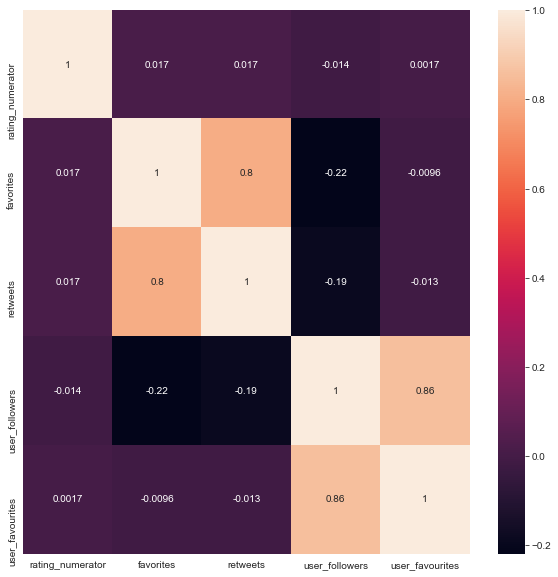

In [1550]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,annot = True)

According to the heatmap,we can found that user_followers and user_favourites are closely correlated.The correlation coefficient between these two variables is 0.86.Therefore, we can graph a scatter plot and fit those scatter into a linear regression line to further view the relation between the two variables.

Text(0.5, 1, 'The relation between favorites and retweets')

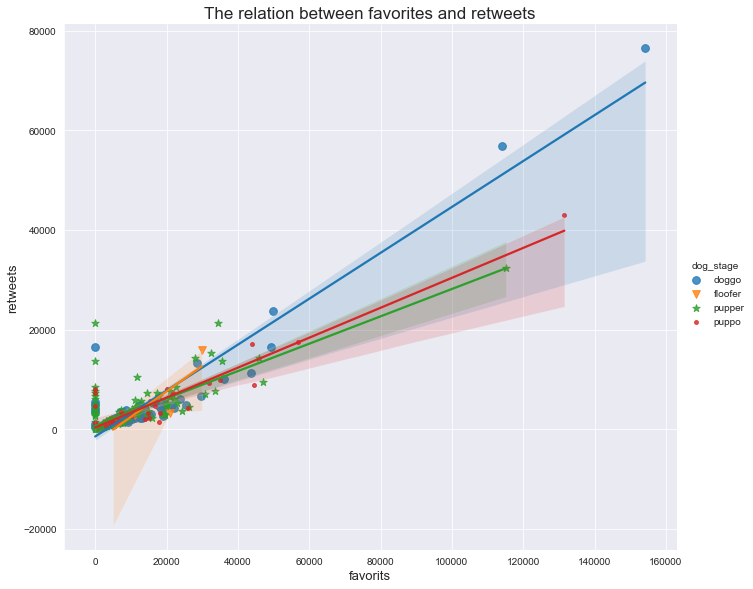

In [1731]:
sns.set_style('darkgrid')
sns.lmplot(x = 'favorites', y = 'retweets',data = final_data,hue = 'dog_stage',scatter_kws={'s':60},markers=['o','v','*','.'],height = 8,aspect = 1.2,fit_reg = True)
plt.xlabel('favorits',fontsize = 13)
plt.ylabel('retweets',fontsize = 13)
plt.title('The relation between favorites and retweets',fontsize = 17)

In this chart,we can conclude that favorites counts and retweets counts are positively correlated. I set the hue = 'dog_stage' so that we can also take the dog_stage variable into consideration in this analysis.All the dog life stages have extreme high value with more than 40000 favourites with the exception of floofer.Doggo has the biggest values for both favourites and retweets.The regression slope for the doggo and floofer are almost the same from the 0 to 30000 favourits.The gradient for doggo is larger than that of pupper and puppo,which means that with one unit increase in the favourits will correlate with larger increase in the retweet in doggo than that of puppo and pupper.Last but not least,there are several observations with 0 favourit counts having more than 10000 retweets,among which one has even more than 20000 retweets.Those observations seem problematic and need further investigation.

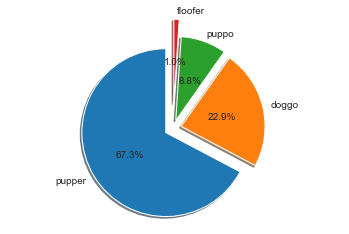

In [1740]:
labels = final_data['dog_stage'].value_counts().index[:4]
data = final_data['dog_stage'].value_counts().values[:4]
explode = [0.1,0.1,0.1,0.3]

fig1,ax1 = plt.subplots()
ax1.pie(data,explode = explode,labels = labels,shadow = True,startangle = 90,autopct='%1.1f%%',pctdistance = 0.5)
ax1.axis('equal')
plt.show()

I plot a pie chart to visulize the proportion of different dog life stage.Pupper takes the lead in all the dog life stage types,accouting for approximately two thirds of the whole population,followed by doggo,which is 22.9%,is almost one third of the percentage of pupper.Puppo is considerably less common than doggo,which only constitutes 8.8% of the population. Floofer ranks the last,only taking up 1%.

In [1691]:
top15_breed = final_data[final_data['prediction_result_for_1'] == True]['most_confident_prediction'].value_counts(ascending = False)[:15]

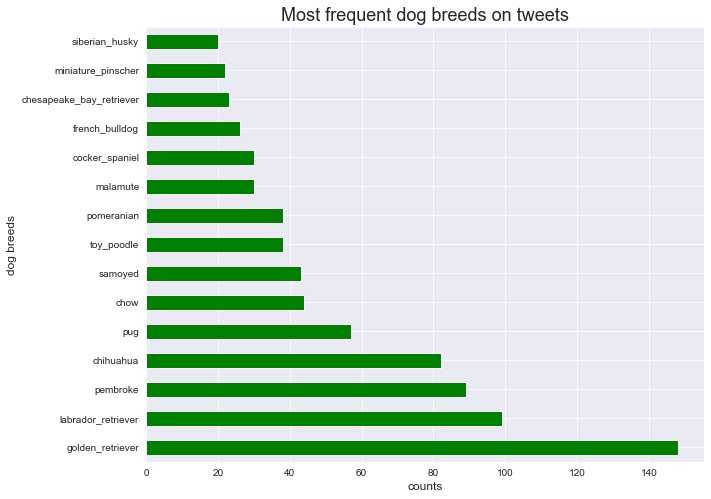

In [1737]:
plt.figure(figsize = (10,8))
plt.xlabel('counts',fontsize = 12)
plt.ylabel('dog breeds',fontsize = 12)
plt.title('Most frequent dog breeds on tweets',fontsize = 18)
top15_breed.plot(kind = 'barh',color = 'green')

I plot a bar chart for the most frequent dog breeds on these tweets.All the top 15 dog breeds have more 20 counts.The most frequent dog breed is golden retriever,which has more than 140 counts on tweets,followed by labrador retriever.

In [1701]:
prediction_true = final_data[final_data['prediction_result_for_1'] == True]
high_rating = prediction_true['rating_numerator'].groupby(prediction_true['most_confident_prediction']).mean()

In [1739]:
data = high_rating.sort_values(ascending = False)[:10]
data

most_confident_prediction
soft-coated_wheaten_terrier    26.700000
west_highland_white_terrier    15.642857
great_pyrenees                 14.928571
borzoi                         14.625000
labrador_retriever             13.797980
siberian_husky                 13.250000
saluki                         12.500000
tibetan_mastiff                12.400000
briard                         12.333333
golden_retriever               12.293919
Name: rating_numerator, dtype: float64

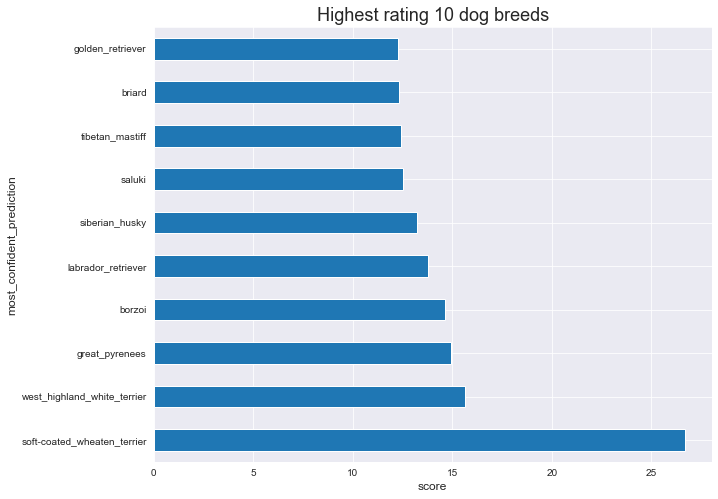

In [1736]:
plt.figure(figsize = (10,8))
plt.xlabel('score',fontsize = 12)
plt.ylabel('dog breeds',fontsize = 12)
plt.title('Highest rating 10 dog breeds',fontsize = 18)
data.plot(kind = 'barh')

I also plot a bar chart for the top 10 dog breeds that have the highest ratings. All the 10 dog breeds have average rating scores that are higher than 12.The dog breed that has the highest rating score is soft coated wheaten terrier,whose rating is higher than 25.Yet the second-ranked dog breed is west highland white terrier that is only scored approximately 15.Let's take a look at the soft coated wheaten terrier.

## End